In [61]:
import alpaca_trade_api as tradeapi
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline



In [62]:
np.random.seed(42)

In [63]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Initialize the API
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [73]:
comm_feb_csv = Path('../Project01/comm_feb.csv')
fin_feb_csv = Path('../Project01/fin_feb.csv')
food_feb_csv = Path('../Project01/food_feb.csv')
hedge_feb_csv = Path('../Project01/hedge_feb.csv')
pharma_feb_csv = Path('../Project01/pharma_feb.csv')
sp500_feb_csv = Path('../Project01/sp500_feb.csv')

comm_apr_csv = Path('../Project01/comm_apr.csv')
fin_apr_csv = Path('../Project01/fin_apr.csv')
food_apr_csv = Path('../Project01/food_apr.csv')
hedge_apr_csv = Path('../Project01/hedge_apr.csv')
pharma_apr_csv = Path('../Project01/pharma_apr.csv')
sp500_apr_csv = Path('../Project01/sp500_apr.csv')


comm_feb_df = pd.read_csv(comm_feb_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
fin_feb_df = pd.read_csv(fin_feb_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
food_feb_df = pd.read_csv(food_feb_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
hedge_feb_df = pd.read_csv(hedge_feb_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
pharma_feb_df = pd.read_csv(hedge_feb_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_feb_df = pd.read_csv(sp500_feb_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

comm_apr_df = pd.read_csv(comm_apr_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
fin_apr_df = pd.read_csv(fin_apr_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
food_apr_df = pd.read_csv(food_apr_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
hedge_apr_df = pd.read_csv(hedge_apr_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
pharma_apr_df = pd.read_csv(hedge_apr_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_apr_df = pd.read_csv(sp500_apr_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [77]:
##Daily Returns
comm_feb_returns = fin_feb_df.pct_change()
fin_feb_returns = fin_feb_df.pct_change()
food_feb_returns = food_feb_df.pct_change()
hedge_feb_returns = hedge_feb_df.pct_change()
pharma_feb_returns = pharma_feb_df.pct_change()
sp500_feb_returns = sp500_feb_df.pct_change()

comm_apr_returns = fin_apr_df.pct_change()
fin_apr_returns = fin_apr_df.pct_change()
food_apr_returns = food_apr_df.pct_change()
hedge_apr_returns = hedge_apr_df.pct_change()
pharma_apr_returns = pharma_apr_df.pct_change()
sp500_apr_returns = sp500_apr_df.pct_change()

#Drop nulls
comm_feb_ret = comm_feb_returns.dropna()
fin_feb_ret = fin_feb_returns.dropna()
food_feb_ret = food_feb_returns.dropna()
hedge_feb_ret = hedge_feb_returns.dropna()
pharma_feb_ret = pharma_feb_returns.dropna()
sp500_feb_ret = sp500_feb_returns.dropna()

comm_apr_ret = comm_apr_returns.dropna()
fin_apr_ret = fin_apr_returns.dropna()
food_apr_ret = food_apr_returns.dropna()
hedge_apr_ret = hedge_apr_returns.dropna()
pharma_apr_ret = pharma_apr_returns.dropna()
sp500_apr_ret = sp500_apr_returns.dropna()


In [87]:
#Combined Pre-COVID-19 ('feb') portfolios and  Post-COVID-19 ('apr') portfolios 
combined_feb_df = pd.concat([comm_feb_ret, fin_feb_ret, food_feb_ret, hedge_feb_ret, pharma_feb_ret, sp500_feb_ret], axis="columns", join="inner")
#combined_apr_df = pd.merge([comm_apr_ret, fin_apr_ret, food_apr_ret, hedge_apr_ret, pharma_apr_ret, sp500_apr_ret], axis="columns", join="inner")
combined_feb_df

ValueError: Shape of passed values is (2652, 21), indices imply (300, 21)

In [66]:
##Standard Deviations of Daily Returns
comm_feb_std = comm_feb_ret.std()
fin_feb_std = fin_feb_ret.std()
food_feb_std = food_feb_ret.std()
hedge_feb_std = hedge_feb_ret.std()
pharma_feb_std = pharma_feb_ret.std()

comm_apr_std = comm_apr_ret.std()
fin_apr_std = fin_apr_ret.std()
food_apr_std = food_apr_ret.std()
hedge_apr_std = hedge_apr_ret.std()
pharma_apr_std = pharma_apr_ret.std()

In [15]:
#Monte Carlo Simulations
## Data Preparation

daily_returns_BAC = fin_covid_returns['BAC']
daily_returns_GS = fin_covid_returns['GS']
daily_returns_PYPL = fin_covid_returns['PYPL']
daily_returns_V = fin_covid_returns['V']

avg_return_BAC = daily_returns_BAC.mean()
avg_return_GS = daily_returns_GS.mean()
avg_return_PYPL = daily_returns_PYPL.mean()
avg_return_V = daily_returns_V.mean()

BAC_std = daily_returns_BAC.std()
GS_std = daily_returns_GS.std()
PYPL_std = daily_returns_PYPL.std()
V_std = daily_returns_V.std()

# Save the last day's closing price
last_close_BAC = fin_covid_df['BAC'][-1]
last_close_GS = fin_covid_df['GS'][-1]
last_close_PYPL = fin_covid_df['PYPL'][-1]
last_close_V = fin_covid_df['V'][-1]




In [16]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 63 
monte_carlo_price_df = pd.DataFrame()
monte_carlo_cum_returns_df = pd.DataFrame()

In [17]:
for x in range(number_simulations):
    simulated_prices_BAC = [last_close_BAC]
    simulated_prices_GS = [last_close_GS]
    simulated_prices_PYPL = [last_close_PYPL]
    simulated_prices_V = [last_close_V]
    
    for n in range(number_records):
        

        simulated_price_BAC = simulated_prices_BAC[-1] * (1 + np.random.normal(avg_return_BAC, BAC_std))
        simulated_price_GS = simulated_prices_GS[-1] * (1 + np.random.normal(avg_return_GS, GS_std))
        simulated_price_PYPL = simulated_prices_PYPL[-1] * (1 + np.random.normal(avg_return_PYPL, PYPL_std))
        simulated_price_V = simulated_prices_V[-1] * (1 + np.random.normal(avg_return_V, V_std))
        
        simulated_prices_BAC.append(simulated_price_BAC)
        simulated_prices_GS.append(simulated_price_GS)
        simulated_prices_PYPL.append(simulated_price_PYPL)
        simulated_prices_V.append(simulated_price_V)
    
    monte_carlo_price_df["BAC prices"] = pd.Series(simulated_prices_BAC)
    monte_carlo_price_df["GS prices"] = pd.Series(simulated_prices_GS)
    monte_carlo_price_df["PYPL prices"] = pd.Series(simulated_prices_PYPL)
    monte_carlo_price_df["V prices"] = pd.Series(simulated_prices_V)
   
    monte_carlo_daily_returns = monte_carlo_price_df.pct_change()
    
    #portfolio weights (4-stock financials portfolio evenly weighted)
    weights = [0.25, 0.25, 0.25, 0.25]

    weighted_monte_carlo_daily_returns = monte_carlo_daily_returns.dot(weights)
    
    

    monte_carlo_cum_returns_df[x] = (1 + weighted_monte_carlo_daily_returns.fillna(0)).cumprod()
    

# monte_carlo_cum_returns_df = pd.Series(monte_carlo_cum_returns)
monte_carlo_cum_returns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.060127,1.007923,0.977917,1.043339,1.007822,1.002413,0.997926,0.984666,0.992147,0.987300,...,0.914698,0.982381,1.024106,1.017433,1.023989,1.024161,1.021403,1.020268,0.953241,1.002512
2,1.062210,1.006369,0.971375,1.074357,1.020032,0.987360,0.954509,1.015758,0.960951,1.020799,...,0.903142,0.966658,1.034672,1.075240,1.004744,1.022916,0.979898,0.986873,0.954535,0.979628
3,1.042926,0.992482,0.924173,1.094920,1.003698,0.988813,0.970785,1.031643,1.004274,1.009543,...,0.864762,0.986330,1.045089,1.080556,1.037070,0.989749,0.981634,0.984723,0.932076,1.016735
4,1.056225,1.015207,0.897412,1.080174,1.047916,0.944152,0.972583,1.030847,1.000322,1.007662,...,0.853269,1.020614,1.049739,1.068941,0.988577,0.987395,0.946464,0.997668,0.929958,1.009375


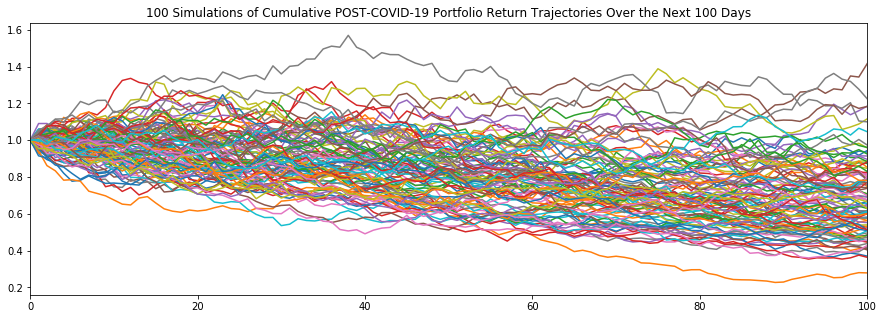

In [18]:
#Plot Monte Carlo 
monte_carlo_cum_returns_df.plot(legend=None, figsize=(15,5), title=f"{number_simulations} Simulations of Cumulative POST-COVID-19 Portfolio Return Trajectories Over the Next 100 Days")

In [ ]:
##Sharpe Ratios
#sharpe_ratio = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
#sharpe_ratios.sort_values(ascending=False)

In [ ]:
# Beta
# YOUR CODE HERE
#covariance = all_portfolio["Custom Port.".cov(all_portfolios["S&P 500"])
#variance = all_portfolios["Custom Port."].var()
#cust_portfolio_beta = tot_covariance / tot_variance
#cust_portfolio_beta